# Open datasets

# Acquiring Data from open repositories

A crucial step in the work of a computational biologist is not only to analyse data, but acquiring datasets to analyse as well as toy datasets to test out computational methods and algorithms. The internet is full of such open datasets. Sometimes you have to sign up and make a user to get authentication, especially for medical data. This can sometimes be time consuming, so here we will deal with easy access resources, mostly of modest size. Multiple python libraries provide a `dataset` module which makes the effort to fetch online data extremely seamless, with little requirement for preprocessing.


### Goal of the notebook

<span style=" font-weight: bold; color: crimson">
Here you will get familiar with some ways to fetch datasets from online. We do some data exploration on the data just for illustration, but the methods will be covered later.
</span>

# Useful resources and links

When playing around with algorithms, it can be practical to use relatively small datasets. A good example is the `datasets` submodule of `scikit-learn`. `Nilearn` (library for neuroimaging) also provides a collection of neuroimaging datasets. Many datasets can also be acquired through the competition website [Kaggle](https://www.kaggle.com), in which they describe how to access the data.


### Links
- [OpenML](https://www.openml.org/search?type=data)
- [Nilearn datasets](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets)
- [Sklearn datasets](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)
- [Kaggle](https://www.kaggle.com/datasets)
- [MEDNIST]

-  [**Awesomedata**](https://github.com/awesomedata/awesome-public-datasets)

 - We strongly recommend to check out the Awesomedata lists of public datasets, covering topics such as [biology/medicine](https://github.com/awesomedata/awesome-public-datasets#biology) and [neuroscience](https://github.com/awesomedata/awesome-public-datasets#neuroscience)

- [Papers with code](https://paperswithcode.com)

- [SNAP](https://snap.stanford.edu/data/)
  - Stanford Large Network Dataset Collection  
- [Open Graph Benchmark (OGB)](https://github.com/snap-stanford/ogb)
  - Network datasets
- [Open Neuro](https://openneuro.org/)
- [Open fMRI](https://openfmri.org/dataset/)

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

We start with scikit-learn's datasets for testing out Machine Learning (ML) algorithms. Visit [here](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets) for an overview of the datasets.

In [2]:
#import multiple datasets from sklearn package
from sklearn.datasets import fetch_olivetti_faces, fetch_20newsgroups, load_breast_cancer, load_diabetes, load_digits, load_iris

### Hand written digits

Load the MNIST dataset that consists of images of hand written digits

In [3]:
X,y = load_digits(return_X_y=True)

In [4]:
y.shape

(1797,)

In [5]:
X.shape #1797 images, 64 pixels per image

(1797, 64)

#### Exercise 1.  Make a function `plot` taking an argument (k) to visualize the k'th sample. 
It is currently flattened, you will need to reshape it. Use `plt.imshow` for plotting. 

In [6]:
# %load solutions/ex2_1.py
def plot(k):
    plt.imshow(X[k].reshape(8,8), cmap='gray')
    plt.title(f"Number = {y[k]}")
    plt.show()

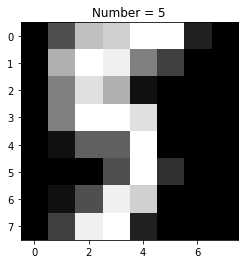

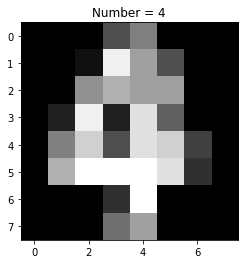

In [7]:
plot(15); plot(450)

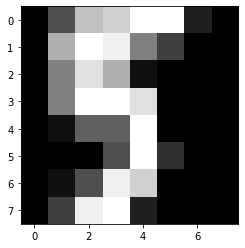

In [8]:
plt.imshow(X[15].reshape(8,8), cmap='gray')

### Olivetti face data

Dataset of 40 subjects faces with varying facial expressions, facial details and lighting

In [9]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Computer\scikit_learn_data


#### Exercise 2. Inspect the dataset. How many classes are there? How many samples per class? Also, plot some examples. What do the classes represent? 

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

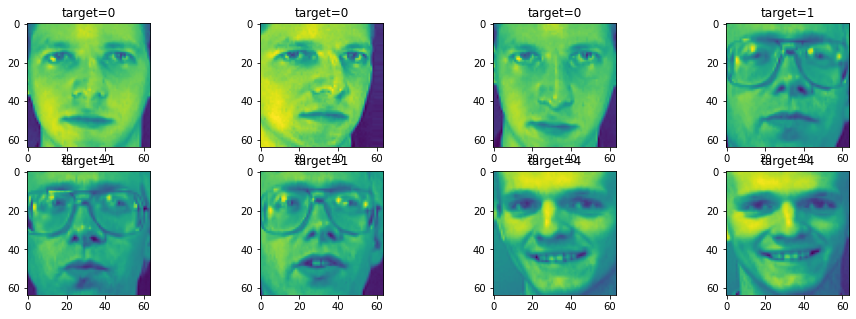

In [10]:
# %load solutions/ex2_2.py

# example solution. 
# You are not expected to make a nice plotting function,
# you can simply call plt.imshow a number of times and observe

print(faces.DESCR) # this shows there are 40 classes, 10 samples per class
print(faces.target) #the targets i.e. classes
print(np.unique(faces.target).shape) # another way to see n_classes

X = faces.images
y = faces.target

fig = plt.figure(figsize=(16,5))
idxs = [0,1,2, 11,12,13, 40,41]
for i,k in enumerate(idxs):
    ax=fig.add_subplot(2,4,i+1)
    ax.imshow(X[k])
    ax.set_title(f"target={y[k]}")
    
# looking at a few plots shows that each target is a single person.

Once you have made yourself familiar with the dataset you can do some data exploration with unsupervised methods, like below. The next few lines of code are simply for illustration, don't worry about the code (we will cover unsupervised methods in submodule F).

In [11]:
from sklearn.decomposition import randomized_svd

In [12]:
X = faces.data

In [13]:
n_dim = 3
u, s, v = randomized_svd(X, n_dim)

F:\miniconda\envs\cbmTest\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


Now we have factorized the images into their constituent parts. The code below displays the various components isolated one by one.

In [14]:
def show_ims(ims):
    fig = plt.figure(figsize=(16,10))
    idxs = [0,1,2, 11,12,13, 40,41,42, 101,101,103]
    for i,k in enumerate(idxs):
        ax=fig.add_subplot(3,4,i+1)
        ax.imshow(ims[k])
        ax.set_title(f"target={y[k]}")

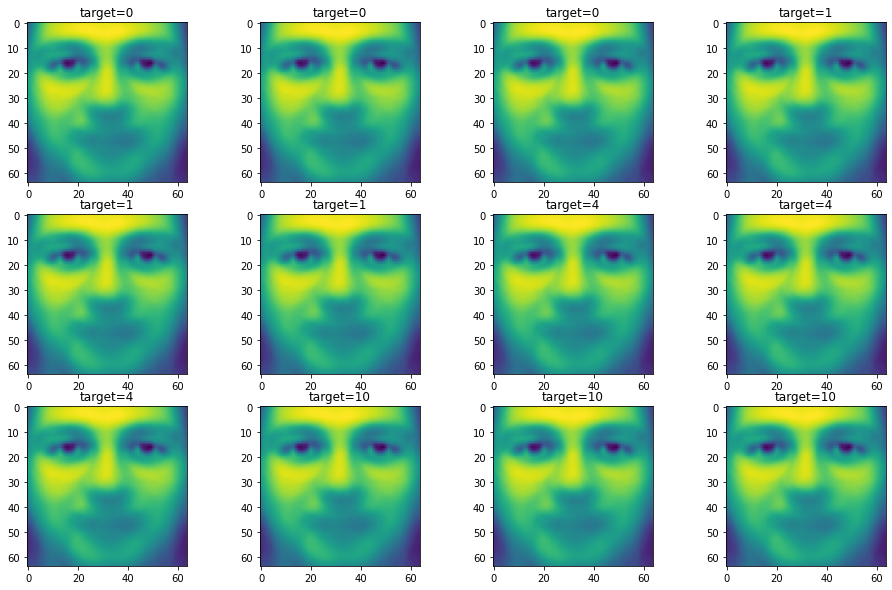

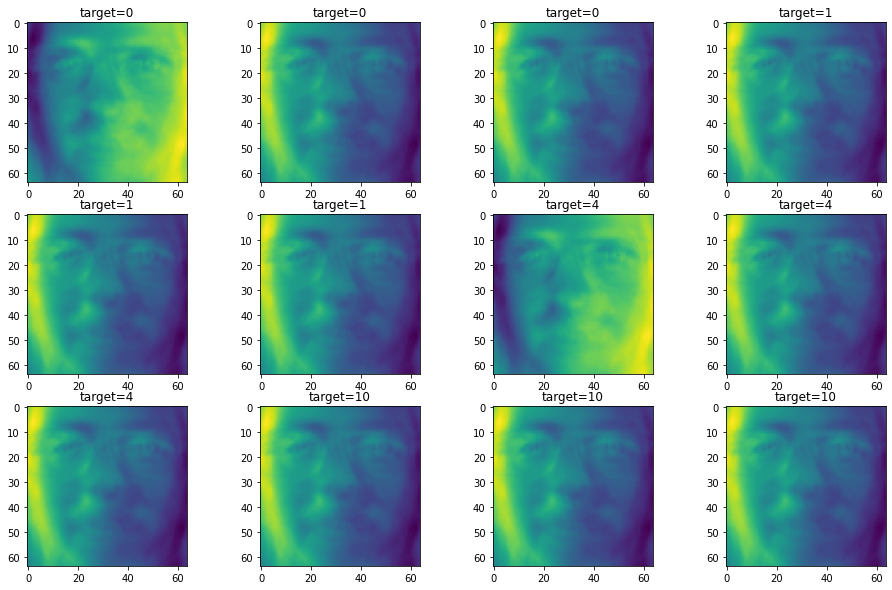

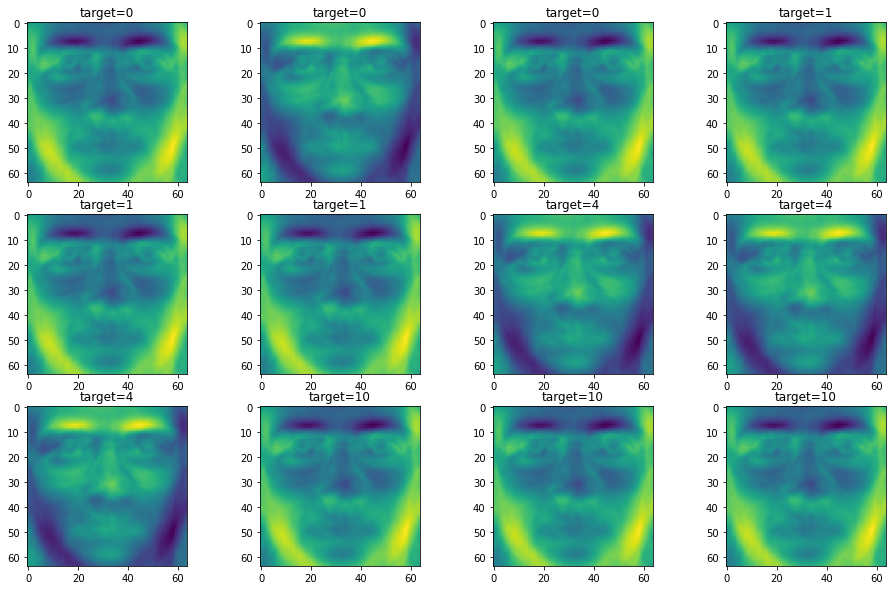

In [15]:
for i in range(n_dim):
    my_s = np.zeros(s.shape[0])
    my_s[i] = s[i]
    recon = u@np.diag(my_s)@v
    recon = recon.reshape(400,64,64)
    show_ims(recon)

Are you able to see what the components represent? It at least looks like the second component signifies the lightning  (the light direction), the third highlights eyebrows and facial chin shape.

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(init='pca', random_state=0)
trans = tsne.fit_transform(X)

F:\miniconda\envs\cbmTest\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
F:\miniconda\envs\cbmTest\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


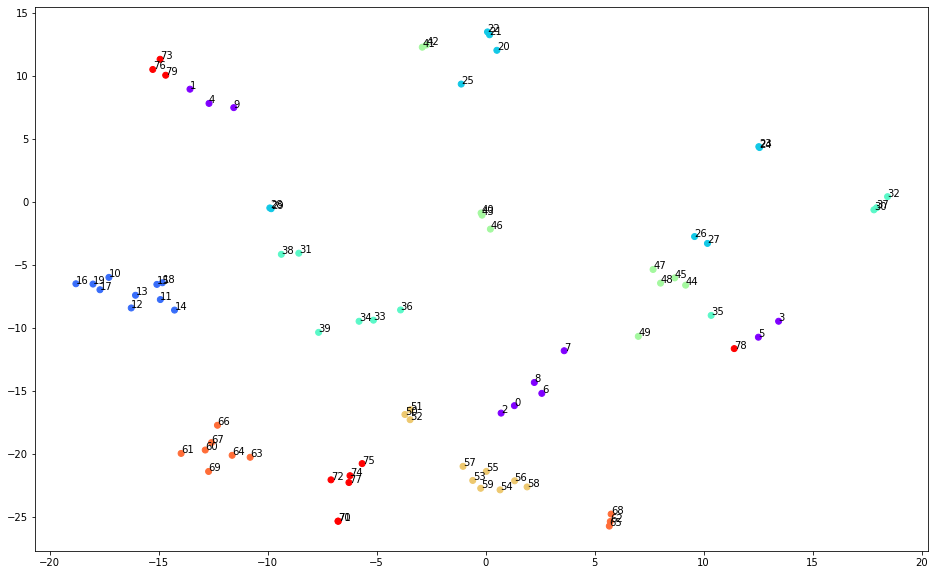

In [18]:
m = 8*10 # choose 4 people

plt.figure(figsize=(16,10))
xs, ys = trans[:m,0], trans[:m,1]
plt.scatter(xs, ys, c=y[:m], cmap='rainbow')

for i,v in enumerate(zip(xs,ys, y[:m])):
    xx,yy,s = v 
    #plt.text(xx,yy,s) #class
    plt.text(xx,yy,i) #index

Many people seem to have multiple subclusters. What is the difference between those clusters? (e.g. 68,62,65 versus the other 60's)

In [20]:
def show(im):
    return plt.imshow(im, cmap='gray')

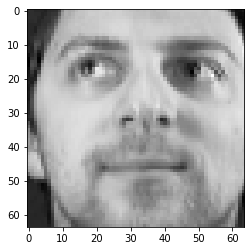

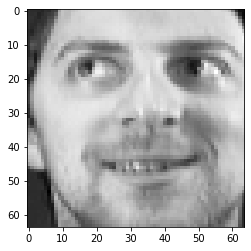

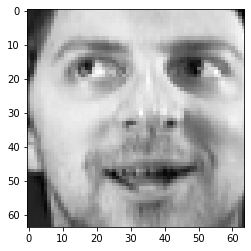

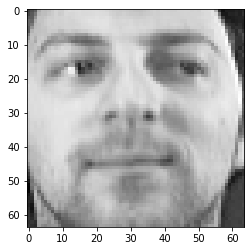

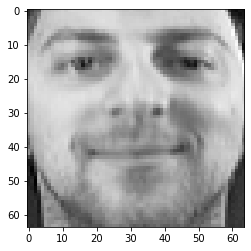

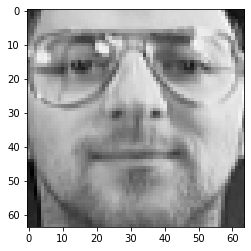

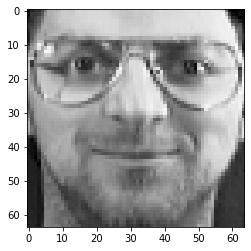

In [19]:
ims = faces.images

idxs = [68,62,65,66,60,64,63]
#idxs = [9,4,1, 5,3]
for k in idxs:
    show(ims[k])
    plt.show()

Import local data

In [3]:
import pandas as pd
df= pd.read_csv('data/covid_impact_on_airport_traffic.csv')

In [4]:
df.shape

(7247, 11)

In [5]:
df.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [6]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [7]:
df.Country.unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [8]:
df.ISO_3166_2.unique()

array(['AU', 'CL', 'CA-AB', 'CA-BC', 'CA-MB', 'CA-NS', 'CA-ON', 'CA-QC',
       'US-CA', 'US-CO', 'US-FL', 'US-GA', 'US-HI', 'US-IL', 'US-MA',
       'US-MI', 'US-NC', 'US-NJ', 'US-NV', 'US-NY', 'US-TX', 'US-VA',
       'US-WA'], dtype=object)

In [9]:
df.AggregationMethod.unique()

array(['Daily'], dtype=object)

## Fetching an OpenML dataset

Here we will look at [OpenML](https://www.openml.org/) - a repository of open datasets free to explore data and test methods.

We need to pass in an ID to access, as follows:

In [ ]:
from sklearn.datasets import fetch_openml

OpenML contains all sorts of datatypes. By browsing the website we found a electroencephalography (EEG) dataset to explore: 

In [ ]:
data_id = 1471 #this was found by browsing OpenML
dataset = fetch_openml(data_id=data_id, as_frame=True)

In [ ]:
dir(dataset)

In [ ]:
dataset.url

In [ ]:
type(dataset)

In [ ]:
print(dataset.DESCR)

In [ ]:
original_names = ['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [ ]:
dataset.feature_names

In [ ]:
df = dataset.frame

In [ ]:
df.head()

In [ ]:
df.shape[0] / 117
# 128 frames per second

In [ ]:
df = dataset.frame
y = df.Class
#df.drop(columns='Class', inplace=True)

In [ ]:
df.dtypes

In [ ]:
#def summary(s):
#    print(s.max(), s.min(), s.mean(), s.std())
#    print()
#    
#for col in df.columns[:-1]:
#    column = df.loc[:,col]
#    summary(column)

In [ ]:
df.plot()

From the plot we can quickly identify a bunch of huge outliers, making the plot look completely uselss. We assume these are artifacts, and remove them.

In [ ]:
df2 = df.iloc[:,:-1].clip_upper(6000)
df2.plot()

Now we see better what is going on. Lets just remove the frames corresponding to those outliers

In [ ]:
frames = np.nonzero(np.any(df.iloc[:,:-1].values>5000, axis=1))[0]
frames

In [ ]:
df.drop(index=frames, inplace=True)

In [ ]:
df.plot(figsize=(16,8))
plt.legend(labels=original_names)

In [ ]:
df.columns

### Do some modelling of the data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lasso = LogisticRegression(penalty='l2')

In [ ]:
X = df.values[:,:-1]
y = df.Class
y = y.astype(np.int) - 1 # map to 0,1

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
lasso.fit(X,y)

In [ ]:
comp = (lasso.predict(X) == y).values

In [ ]:
np.sum(comp.astype(np.int))/y.shape[0] # shitty accuracy

In [ ]:
lasso.coef_[0].shape

In [ ]:
names = dataset.feature_names

In [ ]:
original_names

In [ ]:
coef = lasso.coef_[0]
plt.barh(range(coef.shape[0]), coef)
plt.yticks(ticks=range(14),labels=original_names)

plt.show()

Interpreting the coeficients: we naturally tend to read the magnitude of the coefficients as feature importance. That is a fair interpretation, but currently we did not scale our features to a comparable range prior to fittting the model, so we cannot draw that conclusion.

### Extra exercise. Go to [OpenML](https://openml.org) and use the search function (or just look around) to find any dataset that interest you. Load it using the above methodology, and try to do anything you can to understand the datatype, visualize it etc.

In [ ]:
### YOUR CODE HERE